In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
# 1. Load libraries and dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

df = pd.read_csv('dataset.csv')
df.head(21)
df.tail(10)

,pH,turbidity,dissolved_oxygen,nitrate,temperature,Quality
240,6.72,9.94,3.32,6.25,18.48,Bad
241,7.13,21.84,4.44,7.25,19.19,Bad
242,7.50,10.62,5.75,3.52,17.67,Good
243,7.72,3.11,7.05,0.91,15.94,Good
244,6.48,22.18,8.04,1.01,17.40,Bad
245,7.00,14.31,5.55,3.31,15.10,Good
246,6.92,1.70,7.37,15.79,20.14,Bad
247,6.81,8.48,5.49,8.85,16.92,Good
248,8.26,3.00,5.78,1.57,20.94,Good
249,7.44,1.06,4.19,8.44,13.78,Bad


In [ ]:
print(df.describe())

               pH   turbidity  dissolved_oxygen     nitrate  temperature
count  250.000000  250.000000        250.000000  250.000000   250.000000
mean     7.198520   10.798480          6.865280    6.650320    20.444920
std      0.579543    7.048611          1.978783    4.717371     4.101726
min      5.630000    0.020000          1.610000    0.010000     8.410000
25%      6.790000    5.200000          5.575000    2.662500    17.610000
50%      7.235000   10.060000          6.895000    6.115000    20.420000
75%      7.547500   15.482500          8.147500    9.250000    23.322500
max      9.510000   34.630000         12.150000   20.790000    30.320000


In [ ]:

# No missing values in this synthetic dataset, but demonstrate simple cleaning steps
# Drop duplicates (if any)
df = df.drop_duplicates()

# Convert label to numeric for modeling
df['Quality_label'] = df['Quality'].map({'Good':1, 'Bad':0})
df['Quality_label'].value_counts()

,count
Quality_label,
1,137
0,113


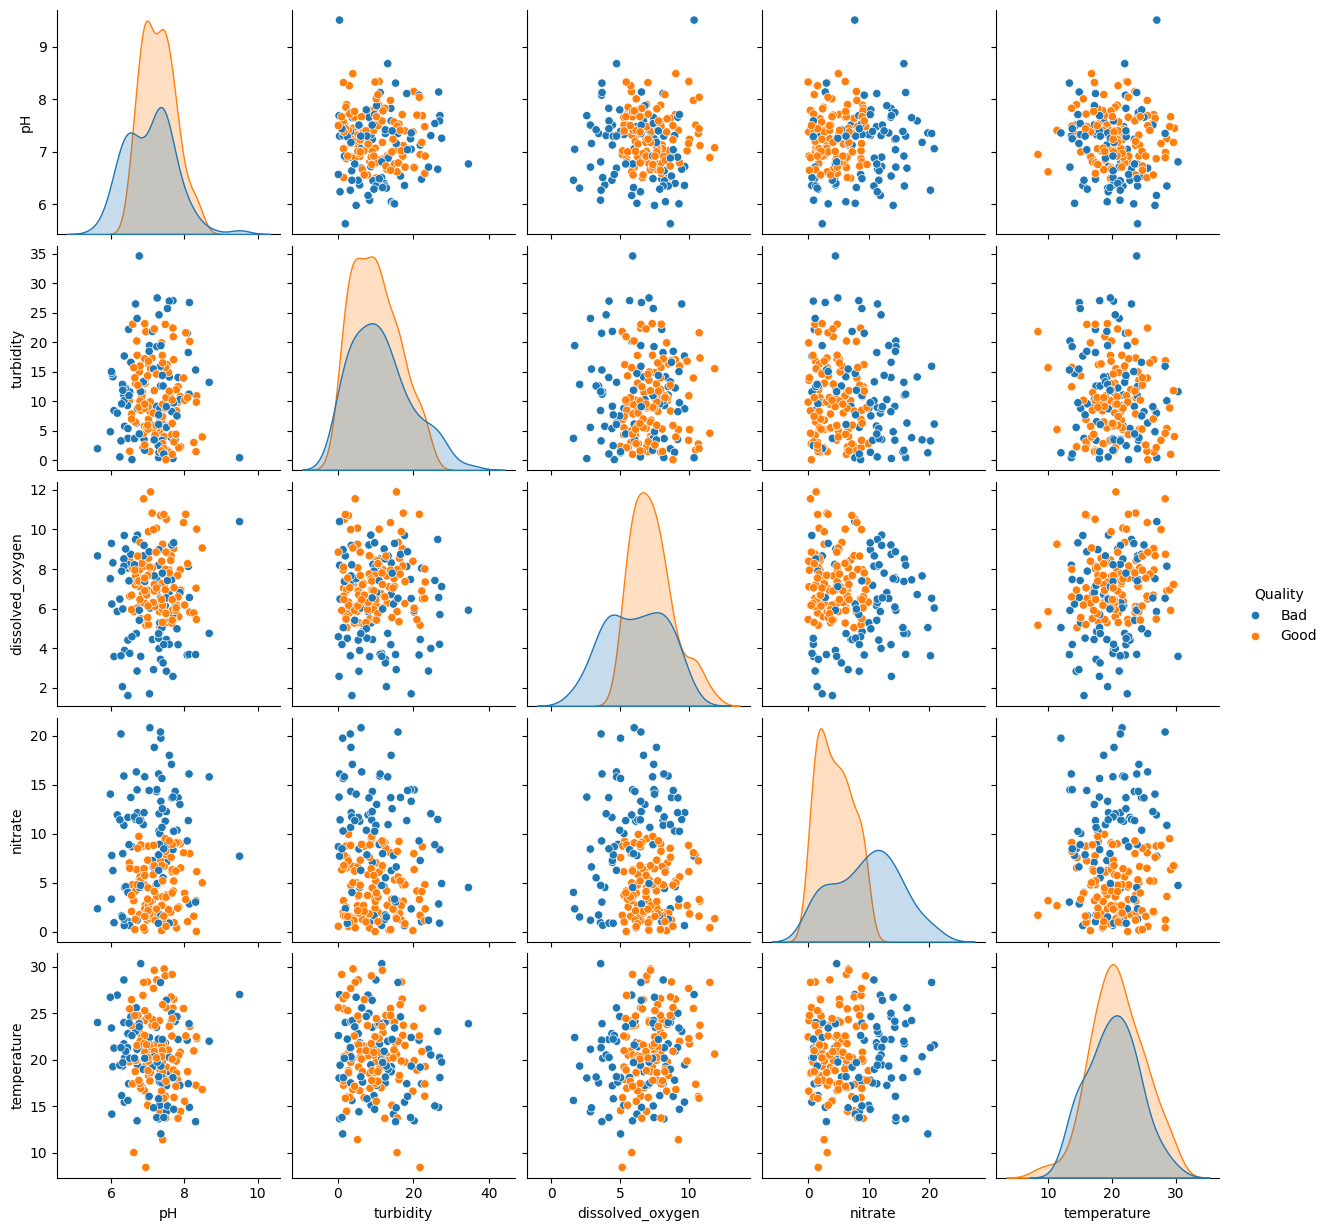

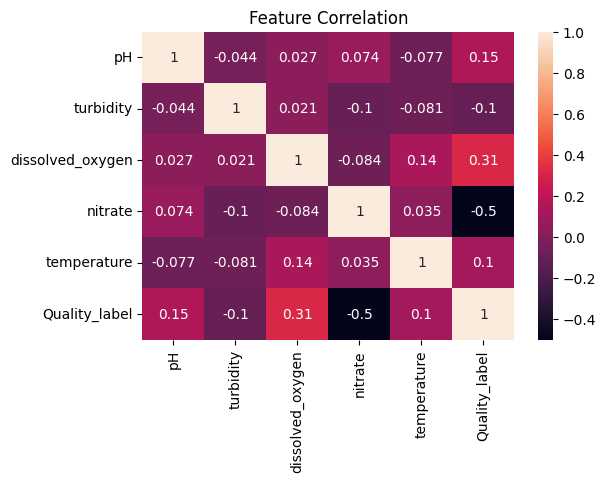

In [ ]:
# Pairplot for features vs Quality (small sample to keep plot readable)
sns.pairplot(df.sample(200), hue='Quality', vars=['pH','turbidity','dissolved_oxygen','nitrate','temperature'])
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['pH','turbidity','dissolved_oxygen','nitrate','temperature','Quality_label']].corr(), annot=True)
plt.title('Feature Correlation')
plt.show()

In [ ]:
# Prepare data
X = df[['pH','turbidity','dissolved_oxygen','nitrate','temperature']]
y = df['Quality_label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (simple)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Fit logistic regression
model = LogisticRegression()
model.fit(X_train_s, y_train)

LogisticRegression()

Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.85      0.85      0.85        27

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



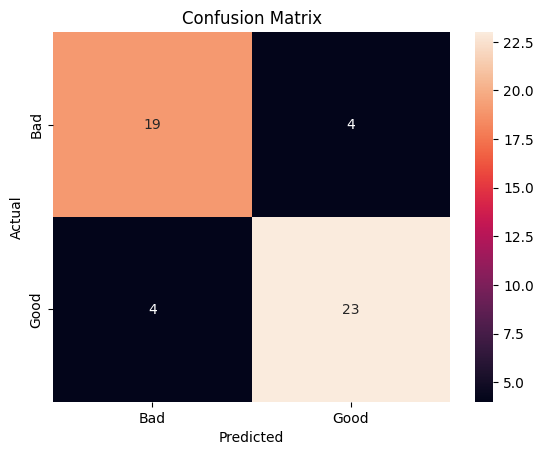

In [ ]:
# Predict & evaluate
y_pred = model.predict(X_test_s)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Bad','Good'], yticklabels=['Bad','Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Optional: save scaler and model
import joblib
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(model, 'logistic_model.joblib')
print('Saved scaler.joblib and logistic_model.joblib')

Saved scaler.joblib and logistic_model.joblib
